# Chapter 3: Getting started with neural networks
- NN Anatomy in depth
- DL Frameworks:
    - Why?
    - Levels of frameworks
- Setting up a DL machine (self-reading)
- Introduction to Keras
- Introduction to DL in cloud: Google Colab
- Example 1: Classifying movie reviews (Binary classification)
- Example 2: Classifying newswires (Multi-class classification)
- Example 3: Predicting house prices (Regression)

## Anatomy of neural network in depth:
Training a neural network revolves around the following
objects:
- Layers, which are combined into a network (or model)
- The input data and corresponding targets
- The loss function, which defines the feedback signal used for learning
- The optimizer, which determines how learning proceeds

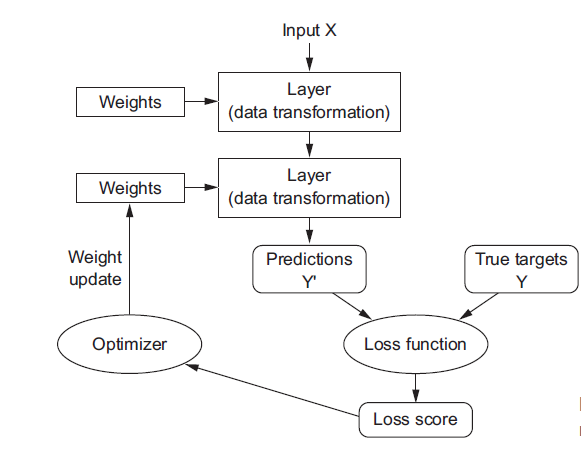



### 1. Data:
_Vector data (2D)_ simple vector data, stored in 2D tensors of shape `(samples, features)`.

_Sequence data (3D)_ Sequence data, stored in 3D tensors of shape `(samples, timesteps, features)`

_Image data (4D)_ Image data, stored in 4D tensors `(samples, channels, length, width)` or `(samples, length, width, channels)`, is usually processed by 2D convolution layers (_Conv2D_).

_Video data (5D)_ tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)
samples could be the batch (size=batch_size)

### Length-Width convention in Math and Image
Usually in Math and Linear algebra libraries like _numpy_ the 2D convention of a rectangle is `rows, cols`==> `width, length`.
In image libraries, like _opencv_, _PIL_, the convention is `cols, rows`==>`width, length`

### 2. Model:

### Layers: the building blocks of deep learning
A __layer__ is a data-processing module that takes as input one or more tensors and that outputs one or more tensors
Some layers are stateless, but more frequently layers have a _state_: the layer’s __weights__, one or several tensors learned with stochastic gradient descent, which together contain the network’s _knowledge_.

#### Dense layers --> Vector data (2D)
simple vector data, stored in 2D tensors of shape `(samples, features)`, is often processed by densely connected layers, also called fully connected or dense layers (the _Dense_ class in Keras)

#### Recurrent (LSTM) layers --> Sequence data (3D)
Sequence data, stored in 3D tensors of shape `(samples, timesteps, features)`, is typically processed by recurrent layers such as an _LSTM_ layer.

#### Convolution (Conv2D) layers --> Image data (4D)    
Image data, stored in 4D tensors `(samples, channels, length, width)` or `(samples, length, width, channels)`, is usually processed by 2D convolution layers (_Conv2D_).


### Layers and Data compatibility 
You can think of layers as the __LEGO__ bricks of deep learning, a metaphor that is made explicit by frameworks like Keras. Building deep-learning models in Keras is done by clipping together compatible layers to form useful data-transformation pipelines. The notion of layer compatibility here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape. Consider the following example:


In [ ]:
from keras import layers
layer = layers.Dense(32, input_shape=(784,))

We’re creating a layer that will only accept as input 2D tensors where the first dimension
is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be
accepted). This layer will return a tensor where the first dimension has been transformed
to be 32. Thus this layer can only be connected to a downstream layer that expects 32-
dimensional vectors as its input. 

__When using Keras, you don’t have to worry about
compatibility, because the layers you add to your models are dynamically built to
match the shape of the incoming layer__. 

For instance, suppose you write the following:

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
model.add(layers.Dense(32))

__The second layer didn’t receive an input shape argument__—instead, it automatically
inferred its input shape as being the output shape of the layer that came before.

### Models: network of layers
Model means a __network architecture__

Using the above convention (which we will learn that is called sequential API), we can build stack of layers.
But soon we will need to handle complex topologies:
- Two-branch networks (Multi-inputs)
- Multihead networks (Multi-outputs)
- Multi-inputs, Multi-outputs
- Inception blocks (Applying multiple parallel convolution layers to the same input).

The topology of a network defines a _hypothesis space_ or _space of possibilities_ for mapping input data to output
data.

What you’ll then be searching for is a good set of values for the _weights_ tensors for that topology of layers.

_Picking the right network architecture is more an art than a science_


## 3. Loss function (objective function)
__The quantity that will be minimized during training. It represents a measure of success for the task at hand__

### Choosing the right objective function for the right problem is extremely important

your network will take any shortcut it can, to minimize the loss; so if the objective
doesn’t fully correlate with success for the task at hand, your network will end up
doing things you may not have wanted. Imagine a stupid, omnipotent AI trained via
SGD, with this poorly chosen objective function: “maximizing the average well-being
of all humans alive.” To make its job easier, this AI might choose to kill all humans
except a few and focus on the well-being of the remaining ones—because average
well-being isn’t affected by how many humans are left. That might not be what you
intended! Just remember that all neural networks you build will be just as ruthless in
lowering their loss function—so choose the objective wisely, or you’ll have to face
unintended side effects.

### Common loss functions
- __binary crossentropy__ for a _two-class_ classification problem, 
- __categorical crossentropy__ for a _many-class_ classification problem,
- __mean squared error__ for a _regression problem_
- _connectionist temporal classification (__CTC__)_ for a _sequence-learning problem_

_Only when you’re working on truly new research problems will you have to develop your own objective functions_


### Multi-loss for multi-outputs
A neural network that has multiple outputs may have multiple loss functions (one per
output). But the gradient-descent process must be based on a single scalar loss value;
so, for multiloss networks, all losses are combined (via averaging) into a single scalar
quantity.

## 4. Optimizer
__Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD)__

### Common optimizers:
- __Adam__ the most commonly used.
- __RMSProp__
- __SGD__
- ...etc

For each one, you have __hyperparameters__ to adjust. The most important one is the __learning rate__. We will talk later about learning rate setting in more details.

 
__Loss functions and optimizers: keys to configuring the learning process__

# Deep learning frameworks, why?
## GPUs drive the revolution in DL
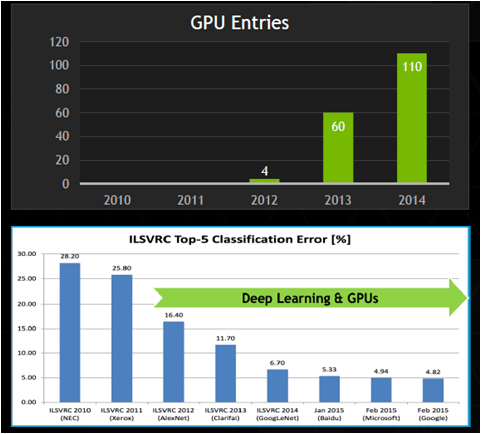



## We need drivers for GPUs (CUDA)
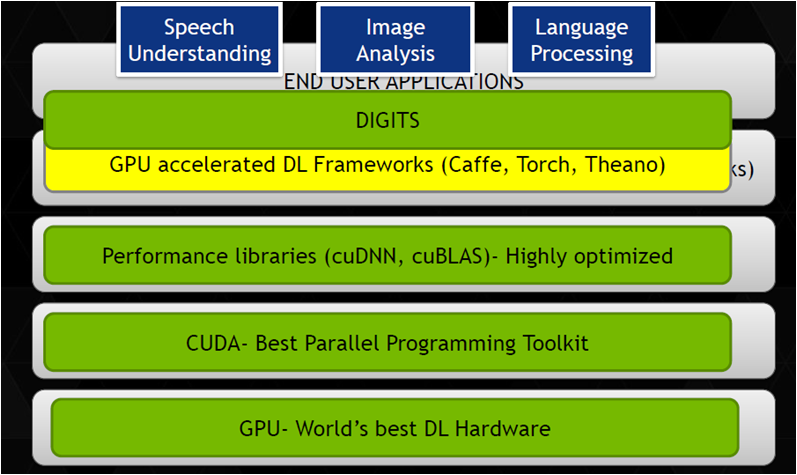

## Properties of DL frameworks:
- Standard Interface, mostly Python
- GPU and CPU compiler 
- Symbolic (auto) differentiation
- BLAS optimization


## Levels of frameworks:
### Low level 
- Computations in general: Theano/Pytorch
- Optimizers and NN names are not known
- Framework calculates the gradients
- You program does the optimization and weights update
- Things like adaptive learning rates, momentum, early stopping..etc are done by you
- Good if you want to come up with your optimization technique

### Mid level 
- Optimization in general- TensorFlow/PyTorch
- NN names are not known (ConvNets, RNN,…etc are unknown)
- You choose the optimizer and objective
- You write your own input-output relation _Model_
- No control over internal programming of optimization technique
- Good if you want to come up with a new model, NN connections,..etc

### High level
- Neural networks (Deep Learning): Keras, Caffee
- NN layers are known--> lstm, convolution, dense,…etc
- No control over the internal connections of layers
- Good to have mix and match of known layers


# Introduction to Keras: applying the NN anatomy
__Revision of earlier MNIST example__

1. __Data__ Define your training data: input tensors and target tensors.



In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

2. __Model__ Define a network of layers (or model ) that maps your inputs to your targets.

There are two ways to define a model: 

__A. using the Sequential class__

only for linear stacks of layers, which is the most common network architecture by far 




As a refresher, here’s a two-layer model defined using the Sequential class (note
that we’re passing the expected shape of the input data to the first layer):


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

__B. using Functional API__ 

for directed acyclic graphs of layers, which lets you build completely arbitrary architectures

- Two-branch networks (Multi-inputs)
- Multihead networks (Multi-outputs)
- Multi-inputs, Multi-outputs
- Inception blocks (Applying multiple parallel convolution layers to the same input).

And here’s the same model defined using the functional API:

In [ ]:
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

## Numpy vs. Keras tensors:
In function API, you treat layers as functions, which takes Keras tensor and returns another Keras tensor.
Keras tensor is a __symbolic__ tensor. It means that it has no value _yet_. So if you try to print them you get a data structure specifying the name, shape, dimension, type,...


In [ ]:
print(output_tensor)


This is different from Numpy tensors, which have immediate values. It also has shape, dimension, type.

In [ ]:
x = np.array([[0., 2., 4.], [1., 3., 5.]])
print(x)

## Static (Symboloic) computation graph
__A model 
You might wonder, why we need two types of tensors?
The answer is that, Keras is built of top of computation graph-based frameworks, like _TensorFlow_.
In such frameworks, you first define an _abstract_ computation graph that defines the path from input to output.

That graph is _static_.



__Other frameworks like _Pytorch_ do not need those two types are they are based on _Dynamic_ graphs__

__Once your model architecture is defined, it doesn’t matter whether you used a Sequential model or the functional API. All of the following steps are the same.__

you can visualize your model using `model.summary`

In [ ]:
model.summary()

3. __Compile__ Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.

The learning process is configured in the compilation step, where you specify the
optimizer and loss function(s) that the model should use, as well as the metrics you
want to monitor during training. 

Here’s an example with a single loss function, which
is by far the most common case:

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss='mse',
                metrics=['accuracy'])

4. __Fit__ Iterate on your training data by calling the fit() method of your model.

__Your _Model_ is defined with symbolic tensors__

__Your _Data_ is defined in Numpy tensors__

Then you `fit()` your _Data_ to your _Model_ to train.
You can think of this step as if you substitute the symbols in the symbolic graph with actual values.

`fit()` initiates the training loop.

Here you need to define the training parameters:
- epochs
- batch_size
- validation_data
- checkpoints (learning schedule, early stopping, best model saving, tensorboard,...etc)

In [ ]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

# Running Deep Learning models:
## Local mode: Setting up a deep-learning workstation
Self reading: section 3.3
    
## ColabNet (Tutorial TODO)

# <center>More Real Examples</center>

# Example 1: Classifying movie reviews: a binary classification example

## 1. Data
You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

__Why use separate training and test sets?__

Because you should never test a machinelearning
model on the same data that you used to train it! Just because a model performs
well on its training data doesn’t mean it will perform well on data it has never
seen; and what you care about is your model’s performance on new data (because you
already know the labels of your training data—obviously you don’t need your model
to predict those). For instance, it’s possible that your model could end up merely memorizing
a mapping between your training samples and their targets, which would be
useless for the task of predicting targets for data the model has never seen before.
We’ll go over this point in much more detail in the next chapter.



## 1.1 Load data

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)# The argument num_words=10000 means you’ll only keep the top 10,000 most frequentlyoccurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [ ]:
train_data[0]

In [ ]:
train_labels[0]

Because you’re restricting yourself to the top 10,000 most frequent words, no word
index will exceed 10,000:

In [ ]:
max([max(sequence) for sequence in train_data])

### Sanity checks
For kicks, here’s how you can quickly decode one of these reviews back to English
words:

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

## 1.2 Prepare data (vectorize, binarize, digitize,...etc)

You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:

-  Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer, which we’ll cover in detail later in the book).

- One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.

_We will use the latter one for simplicity, but you should have noticed that the order of words is mixed. This model is called Bag-of-words_

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Let's have a look on the data transformation:

In [ ]:
x_train[0]

### Labels binarization
You should also vectorize your labels, which is straightforward for _binary classification_:

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now the data is ready to be fed into a neural network.

## 2. Model
Since the input is a 2D vector, then we choose `Dense` layers. Remeber, our choice of the BoW model.
For simplicity, we will be using the Sequential API.

Let's choose the `relu` for activation function, which is the most widely used choice (Activation functions to be revisited later).

The argument being passed to each Dense layer (16) is the number of hidden units of the layer. A _hidden unit_ is a dimension in the representation space of the layer.

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))


You may remember from chapter 2 that each such Dense layer with a relu activation
implements the following chain of tensor operations `output = relu(dot(W, input) + b)`

__Network Capacity = degrees of freedom__
Having 16 hidden units means the weight matrix W will have shape (input_dimension,
16): the dot product with W will project the input data onto a 16-dimensional representation
space (and then you’ll add the bias vector b and apply the relu operation). You
can intuitively understand the dimensionality of your representation space as “how
much freedom you’re allowing the network to have when learning internal representations.”

__Capacity vs. Complexity__
Having more hidden units (a higher-dimensional representation space)
allows your network to learn more-complex representations, but it makes the network
more computationally expensive and may lead to learning unwanted patterns (patterns
that will improve performance on the training data but not on the test data).

__Network architecture definition__
There are two key architecture decisions to be made about such a stack of Dense layers:
- How many layers to use
- How many hidden units to choose for each layer

Now, to have a model, we need to have _Network of layers_. For the Sequential API, we can only do stack of layers.
In next lessons, you’ll learn formal principles to guide you in making these choices. For
the time being, you’ll have to trust me with the following architecture choice:

- Two intermediate layers with 16 hidden units each
- A third layer that will output the scalar prediction regarding the sentiment of the current review

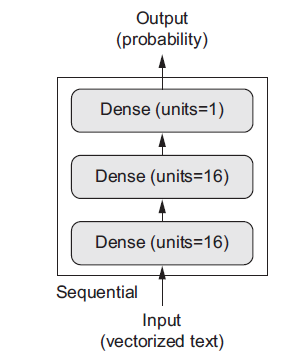

In [ ]:
model.add(layers.Dense(16, activation='relu'))


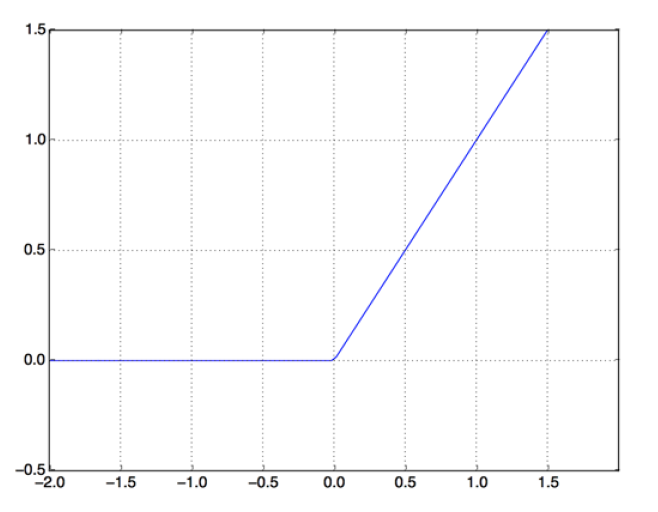

The final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1),indicating how likely the sample is to have the target “1”: how likely the review is to be
positive).

In [ ]:
model.add(layers.Dense(1, activation='sigmoid'))

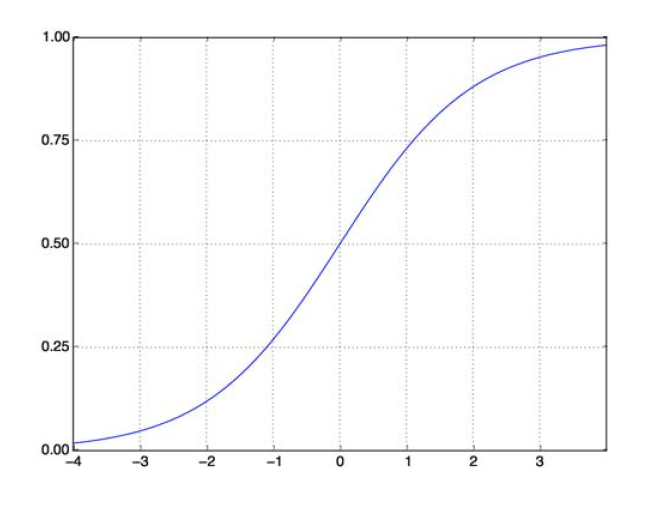

__What are activation functions, and why are they necessary?__

Without an activation function like relu (also called a non-linearity), the Dense layer
would consist of two linear operations—a dot product and an addition:

`output = dot(W, input) + b`

So the layer could only learn _linear transformations_ (affine transformations) of the
input data: the hypothesis space of the layer would be the set of all possible linear
transformations of the input data into a 16-dimensional space. 

Such a hypothesis space is too restricted and wouldn’t benefit from multiple layers of representations,
because a deep stack of linear layers would still implement a linear operation: 
__adding more layers wouldn’t extend the hypothesis space.__

In order to get access to a much richer hypothesis space that would benefit from
deep representations, you need a non-linearity, or activation function. _relu is the
most popular activation function in deep learning_, but there are many other candidates,
which all come with similarly strange names: _prelu, elu_, and so on.

# 3. Compile
## loss 
Because you’re facing a
binary classification problem and the output of your network is a probability (you end
your network with a single-unit layer with a sigmoid activation), it’s best to use the _binary_crossentropy_ loss. It isn’t the only viable choice: you could use, for instance,
_mean_squared_error_. 

_But crossentropy is usually the best choice when you’re dealing
with models that output probabilities._

Crossentropy is a quantity from the field of _Information Theory_ that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

## Optimizer
Let's use RMSProp

## Complie
Here’s the step where you configure the model with the rmsprop optimizer and
the binary_crossentropy loss function. Note that you’ll also monitor accuracy
during training.

In [ ]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

__Another way of passing args to compile__

You’re passing your optimizer, loss function, and metrics as strings, which is possible
because rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras.
Sometimes you may want to configure the parameters of your optimizer or pass a custom
loss function or metric function. The former can be done by passing an optimizer
class instance as the optimizer argument,

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

## Validation
In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# 4. Fit

You’ll now train the model for 20 epochs (20 iterations over all samples in the
x_train and y_train tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the validation_data argument

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

On CPU, this will take less than 2 seconds per epoch—training is over in 20 seconds.
At the end of every epoch, there is a slight pause as the model computes its loss and
accuracy on the 10,000 samples of the validation data.

## Plotting the loss
__History object__

Note that the call to model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training. Let’s look at it:

In [ ]:
history_dict = history.history
history_dict.keys()

The dictionary contains four entries: one per metric that was being monitored during
training and during validation. In the following two listing, let’s use Matplotlib to plot
the training and validation loss side by side

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

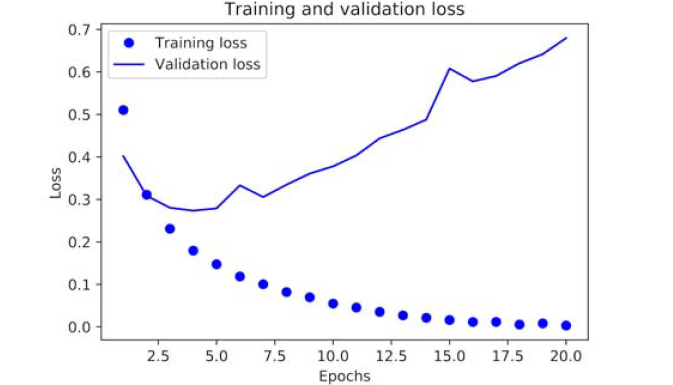

## We can do the same with accuracy

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

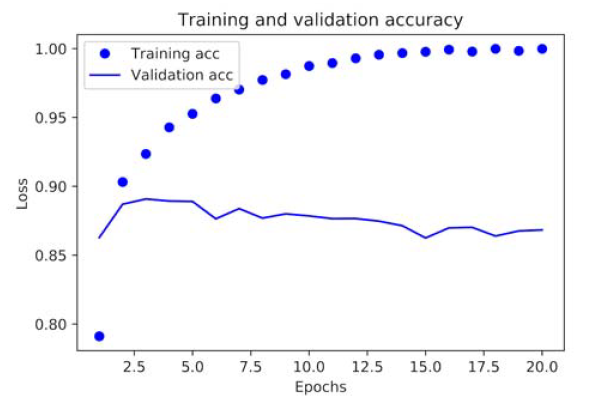

## We are overfitting!
As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent
optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is overfitting:
after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

__How to stop it__

In this case, to prevent overfitting, you could stop training after three epochs. In

general, you can use a range of techniques to mitigate overfitting, which we’ll cover later.

Let's re-train again:

__Important note__
In ipynb, you can't just call fit for epochs=3, because this will train over the last model!

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%.

# Inference
__Using a trained network to generate predictions on new data__


In [ ]:
model.predict(x_test)

# Further things to try:
The following experiments will help convince you that the architecture choices you’ve
made are all fairly reasonable, although there’s still room for improvement:
- You used two hidden layers. Try using one or three hidden layers, and see how
doing so affects validation and test accuracy.
- Try using layers with more hidden units or fewer hidden units: 32 units, 64 units,
and so on.
- Try using the mse loss function instead of binary_crossentropy.
- Try using the tanh activation (an activation that was popular in the early days of
neural networks) instead of relu.

# Example 2: Classifying newswires (Multi-class classification)


# Example 3: Predicting house prices (Regression)